# 1 Sistemi preporuke

Donošenje odluka nije lako. Zato se ljudi uvek oslanjaju na preporuke dobijene od strane prijatelja, od ljudi koji su već napravili takvu odluku, ili od ekperata. Internet je učinio donošenje odluka još težim zbog ogromne količine proizvoda i usluga dostupnih na sajtovima za elektronsku trgovinu, kao i vestima o popustima i rasprodajama svakoga dana. Zbog ovoga ljudi su preplavljeni informacijama i velikim izborom. Ovaj problem rešavaju sve prisutniji i korisćeniji sistemi preporuka.

Sistemi preporuka (eng. recommender systems, recommendation systems) obuhvataju klasu tehnika i algoritama filtriranja podataka koji korisnicima predlažu „relevantne“ proizvode - u opštem slučaju stavke. Stavka je termin koji se koristi za označavanje onoga što sistem preporučuje korisnicima. Pružajući im personalizovani sadržaj koji se odnosi na različite procese donošenja odluka, kao na primer koje predmete treba kupiti, koju muziku slušati ili koje vesti čitati, sistemi preporuka rešavaju problem preopterećenja informacijama (eng. information overload) sa kojima se korisnici neprestano susreću. Jedan od primera u kome su sistemi preporuke značajno doprineli jeste knjiga o planinarenju "Touching the void" koja je postala veoma popularna 9 godina nakon što je publikovana. Naime, nakon toliko godina ova knjiga je bila preporučena na Amazonu zajedno sa sličnom knjigom "Into thin air" koja je nacionalni best seler.

Sistemi preporuka su od velike važnosti za uspeh e-trgovine i IT industrije u današnje vreme. Oni igraju važnu ulogu kod veb sajtova kao što su Amazon, YouTube, Netflix, Yahoo, Tripadvisor, Last.fm, IMDb, Google news, Pandora  i drugi. Takođe, mnoge kompanije razvijaju svoje sisteme preporuka kao deo servisa koji oni pružaju njihovim preplatnicima. Poznato je i da je Netflix, online servis za gledanje filmova, nagradio tim koji je prvi uspeo da unapredi performanse njihovog sistema preporuka nagradom od milion dolara.

Postoje različiti pristupi za razvoj sistema preporuka. Ovi pristupi mogu da koriste:
* <b><font color='darkblue'>Uzajamno filtriranje (eng. collaborative filtering, CF)</font></b>
* <b><font color='darkblue'>Filtriranje zasnovano na grupisanju (eng. content based filtering)</font></b>
* <b><font color='darkblue'>Hibridno filtriranje</font></b>

U ovom projektu biće razvijen sistem preporuka zasnovan na pristupima uzajamnog filtriranja koji koristi k najbližih suseda - KNN. Bice korišćen skup podataka MovieLens. Ostatak ovog rada je organizovan na sledeći način:
* Uvodni deo - Introduction
* Analiza podataka - Data analysis
* Implementacija User based i Item based algoritma koriscenjem najblizih suseda na MovieLens skupu podataka - KNN CF movies dataset
* Implementacija razlicitih funkcija koje racunaju slicnost (Jaccard i Cosine) - Jaccard Cossine Similarity

# 2 Uzajamno filtriranje

Uzajamno filtriranje je proces filtriranja, odnosno pretraživanja informacija i šablona (eng. patterns) i to određivanjem veze između korisnika ili stavki. Naime, posmatraju se korisnici koji su po nekoj osobini/ponašanju slični aktivnom korisniku. Na sličan način moguće je pronaći i slične stavke. Da bi se ovo postiglo koriste se različite matrice sličnosti, o čemu će više reči biti u nastavku rada. U ovoj svesci, nakon dela o primenama tehnika uzajamnog filtriranja, sledi teorijski deo o algoritmima uzajamnog filtriranja zasnovanih na susedstvu, koji su detaljno obrađeni i implementirani u ostalim Jupyter sveskama. Tipovi (vrste) uzajamnog filtriranja o kojima se u nastavku govori važe za uzajamno filtriranje uopšte, bez obzira da li se koristi KNN pristup ili ne.

## 2.1 Primene tehnika uzajamnog filtriranja
Tehnike uzajamnog filtriranja imaju primenu u finansijama, sajtovima za e-trgovinu i drugim veb aplikacijama. Ove tehnike su pogodne za rad sa veoma velikim skupovima podataka.

# 3 Algoritmi uzajamnog filtriranja zasnovani na susedstvu

Algoritmi uzajamnog filtriranja zasnovani na susedstvu (eng. KNN collaborative filtering algorithm) su algoritmi uzajamnog filtriranja kombinovani sa KNN algoritmom, uz pomoć kojeg biraju susede. Zasnivaju se na činjenici da slični korisnici pokazuju slične obrasce ponašanja prilikom ocenjivanja i da slični predmeti dobijaju slične ocene. Naime, ideja je da će korisnici koji su imali slično ponašanje u prošlosti (pravili slične izbore), verovatno imati slično ponašanje (praviti slične izbore) i u budućnosti. Postoje dve primarne vrste ovog algoritma:

* <b><font color='darkblue'>Korisnički zasnovano uzajamno filtriranje (eng. user-based collaborative filtering - </font></b> U ovom slučaju se ocene, koje pružaju korisnici slični ciljnom korisniku $u$, koriste za davanje (generisanje) preporuka za $u$. Predviđene ocene za korisnika $u$ izračunavaju se kao prosečne vrednosti (sa težinama) ovih ocena sličnih korisnika za svaku stavku.

* <b><font color='darkblue'>Uzajamno filtriranje zasnovano na stavkama (eng. item-based collaborative filtering) - </font></b> Da bi se napravile preporuke za ciljnu stavku $i$, prvi korak je odrediti skup stavki S, koji su najsličniji stavci $i$. Zatim, da bi se predvidela ocena određenog korisnika $u$ za stavku $i$, pronalaze se ocene u skupu S, koje su određene od strane korisnika $u$. Prosek (sa težinama) ovih ocena koristi se za izračunavanje predviđene ocene korisnika $u$ za stavku $i$.

Na narednoj slici dat je grafički prikaz uzajamnog filtriranja zasnovanog na korisnicima (slika levo) i na stavkama (slika desno). Na slici 1 prikazano je da ukoliko korisnik A voli stavke 1, 3 i 4, i korisnik C voli stavke 3 i 4, može se zaključiti da su preference korisnika A i korisnika C veoma slične. S obzirom da korisnik A (za razliku od korisnika C) voli još i film 1, ovaj film može biti preporučen i korisniku C. Slično je i kada je u pitanju rad sa stavkama, na slici 2.

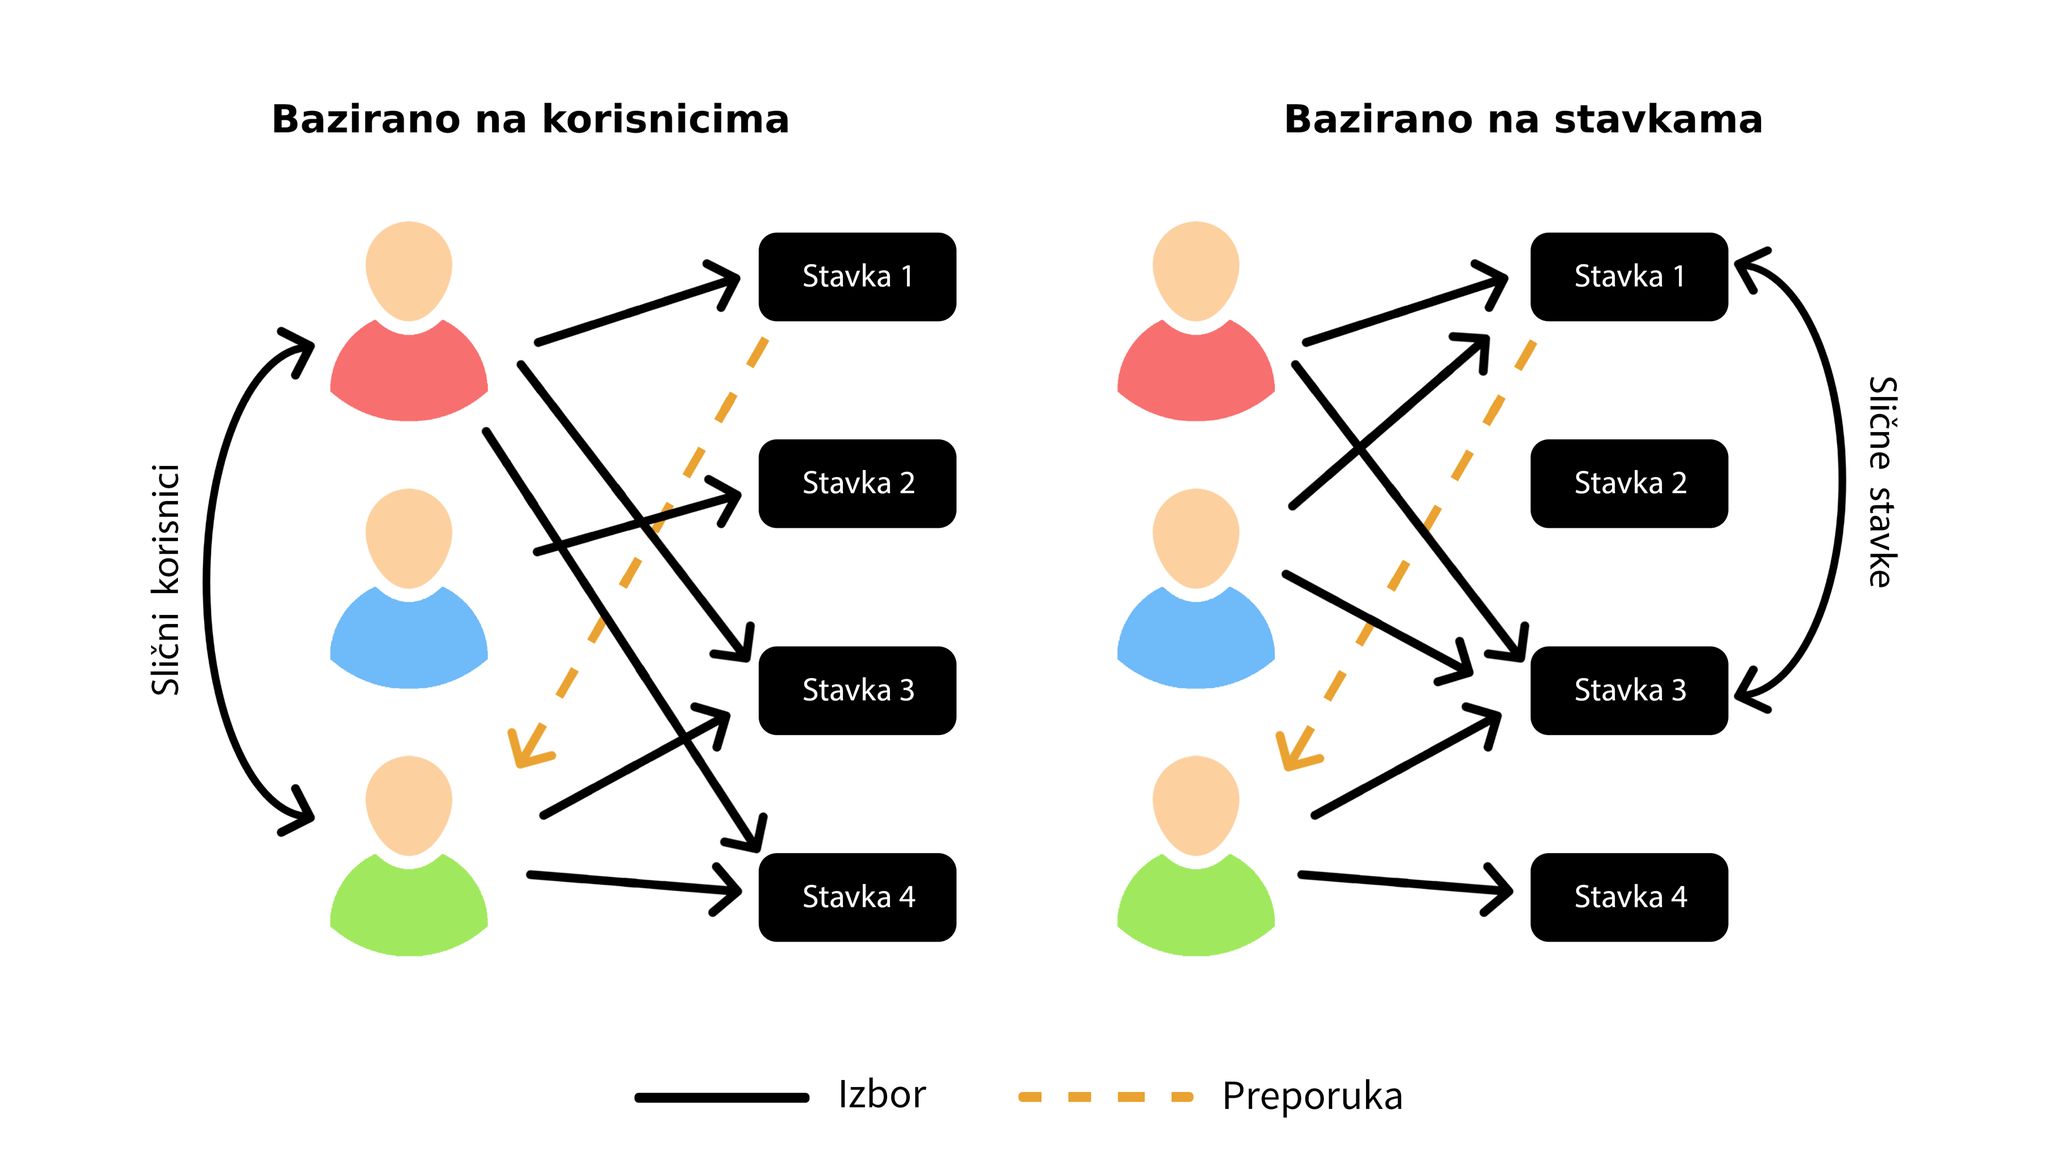

Problem koji može nastati pri korišćenju uzajamnog filtriranja zasnovanog na korisnicima je ukoliko se u jednom periodu nekom korisniku sviđaju određene stavke, a u narednom periodu neke potpuno drugačije, pa poređenje jednog korisnika sa drugim korisnikom koje je zasnovano na prošlosti (prošlom ponašanju) postaje prilično komplikovano. S druge strane, stavka je uvek stavka, ne menja se tokom vremena. Takođe, uglavnom postoji manje stavki nego korisnika, pa se može uštedeti na resursima potrebnim za izračunavanje. Ipak, ovo ne znači da uzajamno filtriranje zasnovano na stavkama uvek daje bolje rezultate od uzajamnog filtriranja zasnovanog na korisnicima.

Algoritam uzajamnog filtriranja zasnovan na susedima može se podeliti na tri osnovna koraka. Ovi koraci, detaljno obrađeni u narednim sekcijama, su:
1. <b><font color='darkblue'>izračunavanje sličnosti korisnika/stavki (eng. user similarity calculation)</font></b>
2. <b><font color='darkblue'>odabir suseda uz pomć algoritma KNN (eng. KNN nearest neighbor selection)</font></b>
3. <b><font color='darkblue'>predviđanje rezultata/ocene (eng. predict score calculation)</font></b>

## 3.1 Računanje sličnosti (eng. similarity calculation) - <font color='darkblue'>1. korak</font>

Sličnost između dva korisnika se izračunava koristeći ocene dodeljene stavkama od strane ta dva korisnika. Za svakog korisnika koristi se N dimenzionalni vektor za prikaz ocena stavke. Na primer, da bi se izračunala sličnost između korisnika $u1$ i korisnika $u3$, prvo treba pronaći skup stavki u kome su sve stavke ocenjene {i1, i2, i4, i5} kao i odgovarajuće ocene ovih stavki. Na primer, neka je vektor ocena korisnika $u1$ {1, 3, 4, 2}, dok je vektor ocena korisnika u3 {2, 4, 1, 5}.  Ovo ilustruje naredna tabela. Sličnost korisnika u1 i korisnika u3 se izračunava uz pomoć neke od formula sličnosti (eng. similarity formula), koje su opisane u nastavku.

| U/I | i1 | i2 | i3 | i4 | i5 |
| --- | --- | --- | --- | --- | --- |
| u1 | 1 | 3 | *3* | 4 | 2 |
| u2 | 3 | 1 | 4 |  |  |
| u3 | 2 | 4 |  | 1 | 5 |
| u4 | 2 |  | 2 |  |  |

Sličnost između korisnika $u$ i $u'$ označava se kao <b>*sim(u, u')*</b>. Metodi koji se najčešće koriste za računanje sličnosti korisnika su <b>*Cosine Similarity*</b> i <b>*Pearson Correlation similarity*</b>. Osim navedenih, u nastavku će biti opisane i neke druge mere sličnosti koje mogu biti od značaja.

### 3.1.1 Cosine similarity
Ovaj metod računa sličnost između dva korisnika tako što računa kosinus ugla između dva vektora. Cilj je kreirati matricu sličnosti korisnika čije vrednosti predstavljaju kosinusnu sličnost između vektorskih reprezentacija korisnika. Vrednosti koje će ova matrica sadržati su iz intervala [0, 1].

Neka $\vec{X_i}$ i $\vec{Y_j}$ predstavljaju vektore ocena korisnika $𝑖$ i $𝑗$. Tada je element $(𝑖,𝑗)$ matrice sličnosti jednak:

$$sim(x_i, y_j) = \cos \angle(\vec{X_i}, \vec{Y_j}) = \frac{\vec{X_i} \cdot \vec{Y_j}}{||\vec{X_i}|| \cdot ||\vec{Y_j}||} = \frac{\sum_{s \in s_{x_iy_j}}r_{x_i,s} \cdot r_{y_j,s}}{\sqrt{\sum_{s \in s_{x_iy_j}}(r_{x_i,s})^2} \cdot \sqrt{\sum_{s \in s_{x_iy_j}}(r_{y_j,s})^2}}$$

$r_{x_i,s}$ i $r_{y_j,s}$ su ocene za $s$ iz skupa $s_{x_iy_j}$- skupa stavki koje su korisnici $i$ i $j$ zajedno ocenili. Drugim rečima, $S_{x_iy_j}$ = {${S \in Stavke | r_{x_i,s} \neq \epsilon \bigcap r_{y_j,s} \neq \epsilon }$}.

### 3.1.2 Pearson correlation similarity
Ovo je mera linearne veze između dve promenljive. Naziva se još i prilagođeni kosinus (eng. adjusted cosine). Ova mera je značajna zbog toga što različiti korisnici imaju različite kriterijume za ocenjivanje. Na primer, neko daje samo visoke ocene, a neko je veoma strog pri ocenjivanju i daje uglavnom niske ocene. Ove razlike nisu primetne samo na individualnom nivou, već i na nivou različitih kultura - neke države su strože u ocenjivanju od drugih. Računanjem sličnosti uz pomoć ove metode ove razlike se normalizuju. Umesto računanja sličnosti među korisnicima koje je zasnovano na njihovim "sirovim" vrednostima ocena, računa se sličnost uz pomoć razlika između ocena korisnika za neku stavku i prosečne ocene tog korisnika za sve stavke. Ovde se računa varijansa prosečne vrednosti ocena svakog korisnika, a ne "sirovih" ocena.

Ova mera je primenljiva i na stavke. U tom slučaju umesto računanja razlike između ocena i prosečnih ocena korisnika, računa se razlika između ocena korisnika i prosečnih ocena svih korisnika za datu stavku ($\overline{I}$).

Sledi formula za računanje <b>sličnosti zasnovane na korisnicima</b>, gde je $\overline{r_x}$ prosečna vrednost ocena (eng. average score) vektora $x$:

$$sim(x,y) = \frac{\sum_{s \in s_{xy}}(r_{x,s}-\overline{r_x}) \cdot (r_{y,s}-\overline{r_y})}{\sqrt{\sum_{s \in s_{xy}}(r_{x,s}-\overline{r_x})^2} \cdot \sqrt{\sum_{s \in s_{xy}}(r_{y,s}-\overline{r_y})^2}}$$

Prethodna metoda ne daje dobre rezultate ukoliko skup podataka predstavlja retku matricu. U tom slučaju razlika između određene ocene i prosečne vrednosti ocena korisnika bila bi jednaka nuli. Dakle, metodu ima smisla koristiti samo ako je poznato da je većina korisnika ocenila veliki broj, odnosno većinu stavki.

### 3.1.3 Mean squared difference

Ova mera koristi sve stavke koje su zajedničke za dva korisnika (skup zajednickih stavki). Srednje kvadratna razlika između dva korisnika $x$ i $y$ računa se prema formuli prikazanoj u nastavku. Iznad razlomačke crte je suma svih stavki koje su korisnik $x$ i korisnik $y$ ocenili - kvadrat razlike između ocena korisnika. To je podeljeno ukupnim brojem stavki koje su zajedničke za ova dva korisnika $x$ i $y$. Ovim se zapravo izračunava koliko su korisnici $x$ i $y$ različiti. Da bi se izračunala sličnost, potrebno je uraditi inverz i dodati $1$, kako bi se izbeglo deljenje nulom u slučaju da ova dva korisnika imaju identične ocene (identično ponašanje).

$$MSD(x, y) = \frac{\sum_{i \in I_{xy}}(x_i-y_i)^2}{|I_{xy}|}$$
$$MSDsim(x, y) = \frac{1}{MSD(x, y) + 1}$$

Ova formula se može preokrenuti tako da se primeni na stavke umesto na korisnike, tako da $x$ i $y$ mogu da referišu na dve različite stavke umesto na dva različita korisnika. Tada se gleda razlika ocena koje su zajedničke za obe stavke umesto stavki koje su zajedničke za korisnike.

### 3.1.4 Jaccard similarity
Sličnost između dva korisnika $A$ i $B$ računa se kao veličina preseka između ocena ova dva korisnika (ono što je za njih zajedničko) podeljeno sa unijom ocena ova dva korisnika. Ovde vrednosti ocena nisu od značaja. Ukoliko se radi sa implicitnim ocena, sama činjenica da je neko nešto gledao ili kupio je od značaja - nema konkretnih ocena, samo da li je neko izrazio intresovanje za neku stavku ili nije. U takvom slučaju ova mera je razuman izbor jer je veoma brza za izračunavanje.

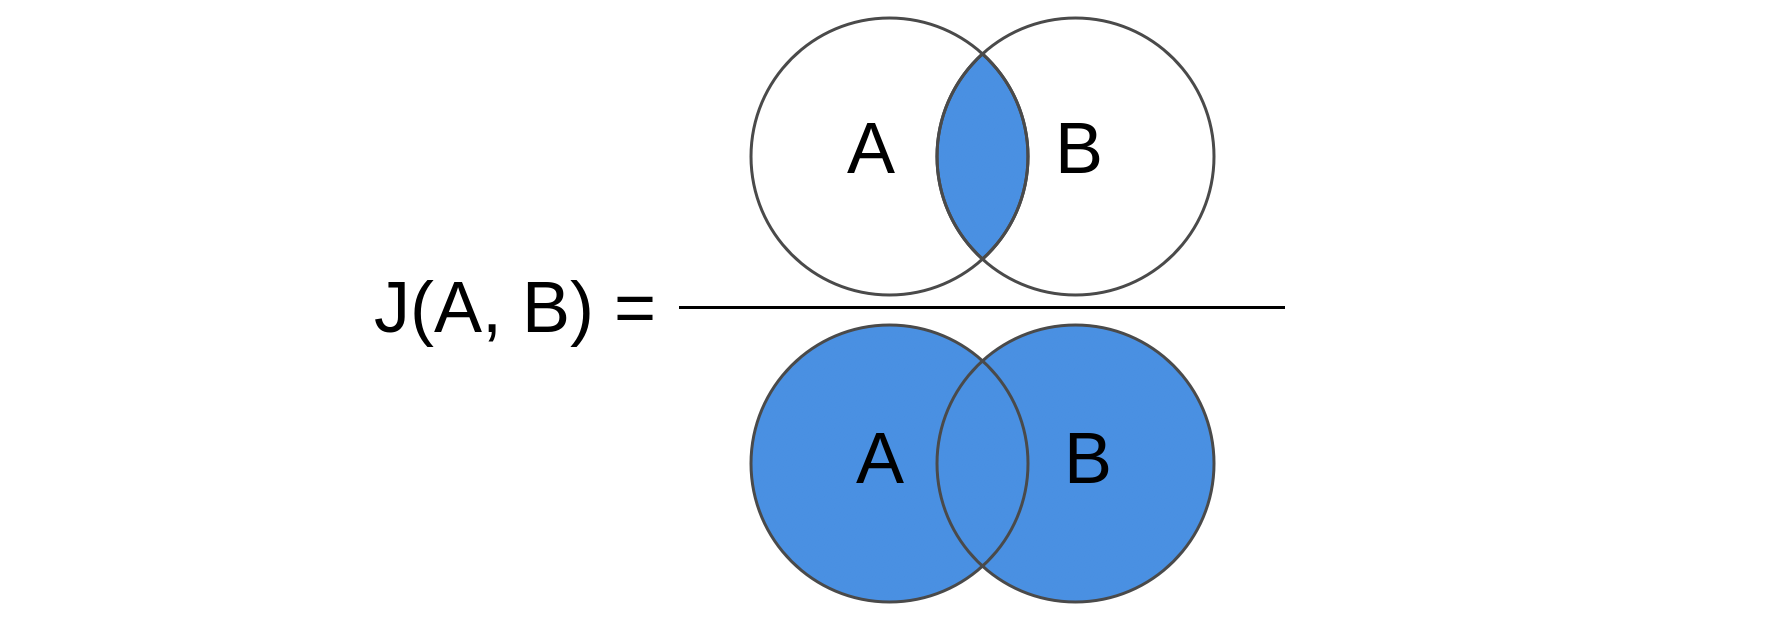

## 3.2 Odabir suseda uz pomoć algoritma KNN (eng. KNN nearest neighbor selection) - <font color='darkblue'>2. korak</font>

Nakon izračunavanja sličnosti između korisnika/stavki, algoritam bira korisnike/stavke sa najvećom sličnošću sa ciljnim korisnikom/stavkom. Ovo je ilustrovano na narednoj slici.

(slika)

## 3.3 Predviđanje ocene (eng. predict score calculation) - <font color='darkblue'>3. korak</font>

Nakon određivanja suseda korisnika $u$, odnosno stavki $i$, sledi računanje ocene koju bi korisnik $u$ mogao da da stavki $i$. U ovom procesu preporučivanja odnosno predviđanja (eng. the process of making a recommendation (prediction)) ocene, predikcija se uspostavlja prema sledećim formulama (zavisno od pristupa - user based ili item based):

* <b>User based</b>, gde je $x_t$ ciljni (eng. target) korisnik, $a_t$ je ciljna stavka, $\overline{r_{x_t}}$ je prosečna vrednost ocena ciljnog korisnika $x_t$, $\overline{r_y}$ je prosečna vrednost ocena korisnika $y$ (koji je iz skupa k najsličnijih suseda ciljnom korisniku $x_t$). Sličnost se računa među korisnicima.

$$prediction(x_t, a_t) = \overline{r_{x_t}} + \frac{\sum_{y \in k\_slicnih\_korisnika}sim(x_t, y) \cdot (r_{y, a_t}-\overline{r_y})}{\sum_{y \in k\_slicnih\_korisnika}sim(x_t, y)}$$

* <b>Item based</b>, gde je $x_t$ ciljni (eng. target) korisnik, $a_t$ je ciljna stavka, $\overline{r_{a_t}}$ je prosečna vrednost ocena ciljne stavke $a_t$, $\overline{r_d}$ je prosečna vrednost ocena stavke $d$ (koja je iz skupa k najsličnijih stavki ciljnoj stavki $a_t$). Sličnost se računa među stavkama.

$$prediction(x_t, a_t) = \overline{r_{a_t}} + \frac{\sum_{d \in k\_slicnih\_stavki}sim(a_t, d) \cdot (r_{x_t, d}-\overline{r_d})}{\sum_{d \in k\_slicnih\_stavki}sim(a_t, d)}$$

### 3.3.1 RMSE - Metrika za ocenu efikasnosti modela

Kako bi predviđene ocene bile što tačnije, odnosno preciznije, treba koristiti neku od metrika za ocenu efikasnosti modela. MSE, Mean Square error je jedna takva metrika, koja računa tačnost (eng. accuracy) i stopu greške (eng. error rate). MSE je funkcija rizika (eng. risk function) koja pomaže u određivanju prosečne kvadratne razlike (eng. average square difference) između predviđenih i stvarnih vrednosti svojstva ili promenljive.

RMSE je skraćeno od Root Mean Square Error, što je kvadratni koren vrednosti koja se dobija izračunavanjem Mean Square Error funkcije. Korišćenjem RMSE moguće je lako plotovati razliku između procenjenih i stvarnih vrednosti parametra modela. Prema ovome je moguće jasno suditi o efikasnosti modela. Formula za računanje je sledeća:

$$RMSE = \sqrt{\frac{\sum_{i \in [1, N]}(predviđeno_i - stvarno_i)^2}{N}}$$